<a href="https://colab.research.google.com/github/SoheliPaul/Machine-Learning/blob/main/2348561DL_Lab1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [98]:
import numpy as np

def perceptron(i1, i2, wgt):
    ips = np.array([i1, i2, 1])
    sum = np.dot(wgt, ips)
    op = 1 if sum >= 0 else 0
    return op

def display_results(ops, targets, weights):
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        print(f"Input: {ops[i]}  Target Output: {targets[i]}  Predicted Output: {predicted_output}  Error: {error}")

def update_weights(weights, ops, targets, learning_rate=1):
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        weights += learning_rate * error * np.array([ops[i][0], ops[i][1], 1])
    return weights

def main():
    # Manual assignment of weights
    initial_weights = np.array([0.5, 0.5, -0.7])

    # AND operation
    print("AND Operation:")
    ops_and = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_and = [0, 0, 0, 1]
    display_results(ops_and, targets_and, initial_weights)
    trained_weights_and = update_weights(initial_weights, ops_and, targets_and)

    # OR operation
    print("\nOR Operation:")
    ops_or = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_or = [0, 1, 1, 1]
    display_results(ops_or, targets_or, initial_weights)
    trained_weights_or = update_weights(initial_weights, ops_or, targets_or)

    # XOR operation (requires a multi-layer approach due to non-linearity)
    print("\nXOR Operation:")
    ops_xor = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_xor = [0, 1, 1, 0]
    display_results(ops_xor, targets_xor, initial_weights)
    trained_weights_xor = update_weights(initial_weights, ops_xor, targets_xor)

if __name__ == "__main__":
    main()

AND Operation:
Input: (0, 0)  Target Output: 0  Predicted Output: 0  Error: 0
Input: (0, 1)  Target Output: 0  Predicted Output: 0  Error: 0
Input: (1, 0)  Target Output: 0  Predicted Output: 0  Error: 0
Input: (1, 1)  Target Output: 1  Predicted Output: 1  Error: 0

OR Operation:
Input: (0, 0)  Target Output: 0  Predicted Output: 0  Error: 0
Input: (0, 1)  Target Output: 1  Predicted Output: 0  Error: 1
Input: (1, 0)  Target Output: 1  Predicted Output: 0  Error: 1
Input: (1, 1)  Target Output: 1  Predicted Output: 1  Error: 0

XOR Operation:
Input: (0, 0)  Target Output: 0  Predicted Output: 1  Error: -1
Input: (0, 1)  Target Output: 1  Predicted Output: 1  Error: 0
Input: (1, 0)  Target Output: 1  Predicted Output: 1  Error: 0
Input: (1, 1)  Target Output: 0  Predicted Output: 1  Error: -1



NAND Operation:


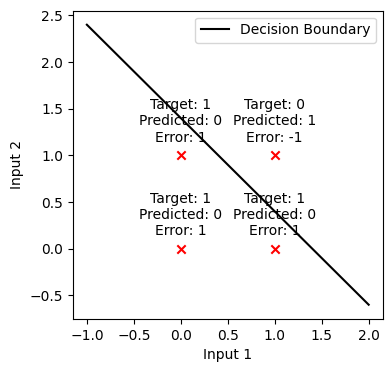


Table for Input, Predicted Output, Target Output, and Error:
   Input 1  Input 2  Predicted Output  Target Output  Error
0        0        0                 0              1      1
1        0        1                 0              1      1
2        1        0                 0              1      1
3        1        1                 1              0     -1


In [99]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def perceptron(i1, i2, wgt):
    ips = np.array([i1, i2, 1])
    sum_val = np.dot(wgt, ips)
    op = 1 if sum_val >= 0 else 0
    return op

def display_results(ax, ops, targets, weights, title="Operation"):
    ymin, ymax = -1, 2
    w = weights[:-1]
    a = -w[0] / w[1]
    xx = np.linspace(ymin, ymax)
    yy = a * xx - (weights[-1]) / w[1]

    # Plot decision boundary
    ax.plot(xx, yy, 'k-', label='Decision Boundary')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.legend()

    # Plot data points, predicted outcome, and error
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output

        color = 'green' if predicted_output == targets[i] else 'red'
        marker = 'x' if error != 0 else 'o'

        ax.scatter(ops[i][0], ops[i][1], c=color, marker=marker, label=f'Data Point {i+1}')

        ax.annotate(f'Target: {targets[i]}\nPredicted: {predicted_output}\nError: {error}',
                    (ops[i][0], ops[i][1]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

def display_table(ops, targets, weights):
    table_data = []
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        table_data.append([ops[i][0], ops[i][1], predicted_output, targets[i], error])

    df = pd.DataFrame(table_data, columns=['Input 1', 'Input 2', 'Predicted Output', 'Target Output', 'Error'])
    print("\nTable for Input, Predicted Output, Target Output, and Error:")
    print(df)

def update_weights(weights, ops, targets, learning_rate=1):
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        weights += learning_rate * error * np.array([ops[i][0], ops[i][1], 1])
    return weights

def main():
    # Manual assignment of weights
    initial_weights = np.array([0.5, 0.5, -0.7])
  # NAND operation
    print("\nNAND Operation:")
    ops_nand = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_nand = [1, 1, 1, 0]

    fig, ax = plt.subplots(figsize=(4, 4))
    display_results(ax, ops_nand, targets_nand, initial_weights, title="NAND Operation")

    # Display table for NAND operation
    display_table(ops_nand, targets_nand, initial_weights)

if __name__ == "__main__":
    main()

OR Operation:


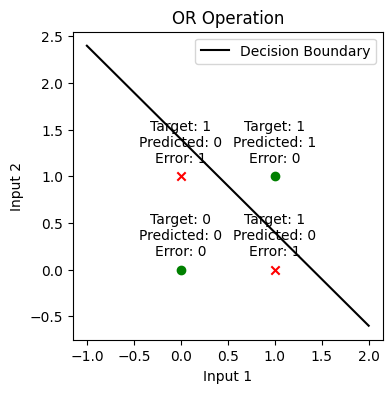

In [88]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(i1, i2, wgt):
    ips = np.array([i1, i2, 1])
    sum_val = np.dot(wgt, ips)
    op = 1 if sum_val >= 0 else 0
    return op

def display_results(ax, ops, targets, weights, title="Operation"):
    ymin, ymax = -1, 2
    w = weights[:-1]
    a = -w[0] / w[1]
    xx = np.linspace(ymin, ymax)
    yy = a * xx - (weights[-1]) / w[1]

    # Plot decision boundary
    ax.plot(xx, yy, 'k-', label='Decision Boundary')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.legend()

    # Plot data points, predicted outcome, and error
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output

        color = 'green' if predicted_output == targets[i] else 'red'
        marker = 'x' if error != 0 else 'o'

        ax.scatter(ops[i][0], ops[i][1], c=color, marker=marker, label=f'Data Point {i+1}')

        ax.annotate(f'Target: {targets[i]}\nPredicted: {predicted_output}\nError: {error}',
                    (ops[i][0], ops[i][1]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.title(title)
    plt.show()

def update_weights(weights, ops, targets, learning_rate=1):
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        weights += learning_rate * error * np.array([ops[i][0], ops[i][1], 1])
    return weights

def main():
    # Manual assignment of weights
    initial_weights = np.array([0.5, 0.5, -0.7])

    # OR operation
    print("OR Operation:")
    ops_or = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_or = [0, 1, 1, 1]

    fig, ax = plt.subplots(figsize=(4, 4))
    display_results(ax, ops_or, targets_or, initial_weights, title="OR Operation")

if __name__ == "__main__":
    main()


AND Operation:


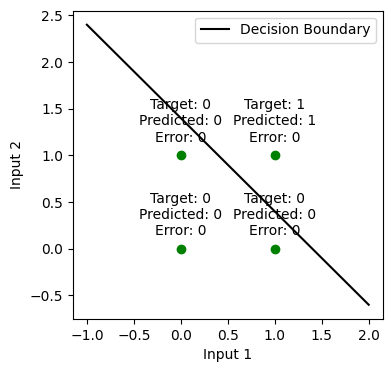

In [72]:
import numpy as np
import matplotlib.pyplot as plt

def perceptron(i1, i2, wgt):
    ips = np.array([i1, i2, 1])
    sum_val = np.dot(wgt, ips)
    op = 1 if sum_val >= 0 else 0
    return op

def display_results(ax, ops, targets, weights, title="Operation"):
    ymin, ymax = -1, 2
    w = weights[:-1]
    a = -w[0] / w[1]
    xx = np.linspace(ymin, ymax)
    yy = a * xx - (weights[-1]) / w[1]

    # Plot decision boundary
    ax.plot(xx, yy, 'k-', label='Decision Boundary')
    ax.set_xlabel('Input 1')
    ax.set_ylabel('Input 2')
    ax.legend()

    # Plot data points, predicted outcome, and error
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output

        color = 'green' if predicted_output == targets[i] else 'red'
        marker = 'x' if error != 0 else 'o'

        ax.scatter(ops[i][0], ops[i][1], c=color, marker=marker, label=f'Data Point {i+1}')

        ax.annotate(f'Target: {targets[i]}\nPredicted: {predicted_output}\nError: {error}',
                    (ops[i][0], ops[i][1]), textcoords="offset points", xytext=(0, 10), ha='center')

    plt.show()

def update_weights(weights, ops, targets, learning_rate=1):
    for i in range(len(ops)):
        predicted_output = perceptron(ops[i][0], ops[i][1], weights)
        error = targets[i] - predicted_output
        weights += learning_rate * error * np.array([ops[i][0], ops[i][1], 1])
    return weights

def main():
    # Manual assignment of weights
    initial_weights = np.array([0.5, 0.5, -0.7])

    # AND operation
    print("AND Operation:")
    ops_and = [(0, 0), (0, 1), (1, 0), (1, 1)]
    targets_and = [0, 0, 0, 1]

    fig, ax = plt.subplots(figsize=(4, 4))
    display_results(ax, ops_and, targets_and, initial_weights, title="AND Operation")

if __name__ == "__main__":
    main()


[AND Operation] training perceptron for AND operation...
[AND Operation] Epoch=1, Error=3, Bias=0.3592243876743134, Optimal Weights=[-0.03585308  0.82807438]
[AND Operation] Epoch=2, Error=3, Bias=0.05922438767431343, Optimal Weights=[-0.13585308  0.72807438]
[AND Operation] Epoch=3, Error=2, Bias=-0.14077561232568658, Optimal Weights=[-0.13585308  0.62807438]
[AND Operation] Epoch=4, Error=1, Bias=-0.2407756123256866, Optimal Weights=[-0.13585308  0.52807438]
[AND Operation] Epoch=5, Error=2, Bias=-0.2407756123256866, Optimal Weights=[-0.03585308  0.52807438]
[AND Operation] Epoch=6, Error=1, Bias=-0.3407756123256866, Optimal Weights=[-0.03585308  0.42807438]
[AND Operation] Epoch=7, Error=2, Bias=-0.34077561232568665, Optimal Weights=[0.06414692 0.42807438]
[AND Operation] Epoch=8, Error=2, Bias=-0.34077561232568665, Optimal Weights=[0.16414692 0.42807438]
[AND Operation] Epoch=9, Error=1, Bias=-0.4407756123256866, Optimal Weights=[0.16414692 0.32807438]
[AND Operation] Epoch=10, Err

<ipython-input-59-c9ac026f17fb>:81: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')


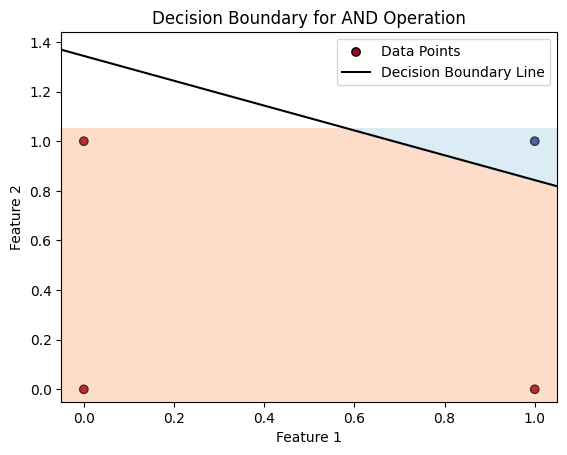

In [59]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # Initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha

    def step(self, x):
        # Apply the step function element-wise
        return np.where(x > 0, 1, 0)

    def fit(self, X, y, epochs=10):
        # Insert a column of 1's as the last entry in the feature matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # Loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # Loop over each individual data point
            error_sum = 0
            for (x, target) in zip(X, y):
                # Take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))

                # Calculate the error
                error = p - target

                # Update the weight matrix
                self.W += -self.alpha * error * x

                # Accumulate the error for this epoch
                error_sum += np.abs(error)

            # During training, print error, bias, and optimal weights for each epoch
            print("[AND Operation] Epoch={}, Error={}, Bias={}, Optimal Weights={}".format(
                epoch + 1, error_sum, self.W[-1], self.W[:-1]))

            # Terminate the training if the error is 0
            if error_sum == 0:
                print("[AND Operation] Training terminated as error becomes 0.")
                break

        # Print the final optimal weights and bias
        print("\n[AND Operation] Final Optimal Weights: {}".format(self.W[:-1]))
        print("[AND Operation] Final Optimal Bias: {}".format(self.W[-1]))

    def predict(self, X, addBias=True):
        # Ensure our input is a matrix
        X = np.atleast_2d(X)

        # Check to see if the bias column should be added
        if addBias:
            # Insert a column of 1's as the last entry in the feature matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]

        # Take the dot product between the input features and the
        # weight matrix, then pass the value through the step function
        return self.step(np.dot(X, self.W))

    def plot_decision_boundary(self, X, y):
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', label='Data Points')

        # Plot decision boundary
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create meshgrid
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))

        # Flatten the meshgrid and predict for each point
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape and plot filled contour
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')

        # Plot decision boundary line
        ymin, ymax = ylim
        w = self.W[:-1]
        a = -w[0] / w[1]
        xx_line = np.linspace(ymin, ymax)
        yy_line = a * xx_line - (self.W[-1]) / w[1]
        plt.plot(xx_line, yy_line, 'k-', label='Decision Boundary Line')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary for AND Operation')
        plt.legend()
        plt.show()

# Construct the AND dataset
X_and = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_and = np.array([0, 0, 0, 1])

# Define our perceptron and train it
print("[AND Operation] training perceptron for AND operation...")
p_and = Perceptron(X_and.shape[1], alpha=0.1)
p_and.fit(X_and, y_and, epochs=20)

# Plot the decision boundary with data points
p_and.plot_decision_boundary(X_and, y_and)


[OR Operation] training perceptron for OR operation...
[OR Operation] Epoch=1, Error=1, Bias=1.157115480429009, Optimal Weights=[-0.65125878 -0.34786043]
[OR Operation] Epoch=2, Error=1, Bias=1.0571154804290088, Optimal Weights=[-0.65125878 -0.34786043]
[OR Operation] Epoch=3, Error=2, Bias=1.0571154804290088, Optimal Weights=[-0.55125878 -0.24786043]
[OR Operation] Epoch=4, Error=1, Bias=0.9571154804290088, Optimal Weights=[-0.55125878 -0.24786043]
[OR Operation] Epoch=5, Error=1, Bias=0.8571154804290089, Optimal Weights=[-0.55125878 -0.24786043]
[OR Operation] Epoch=6, Error=2, Bias=0.8571154804290089, Optimal Weights=[-0.45125878 -0.14786043]
[OR Operation] Epoch=7, Error=1, Bias=0.7571154804290089, Optimal Weights=[-0.45125878 -0.14786043]
[OR Operation] Epoch=8, Error=1, Bias=0.6571154804290089, Optimal Weights=[-0.45125878 -0.14786043]
[OR Operation] Epoch=9, Error=2, Bias=0.6571154804290089, Optimal Weights=[-0.35125878 -0.04786043]
[OR Operation] Epoch=10, Error=1, Bias=0.55711

<ipython-input-56-5070645e1bb5>:82: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')


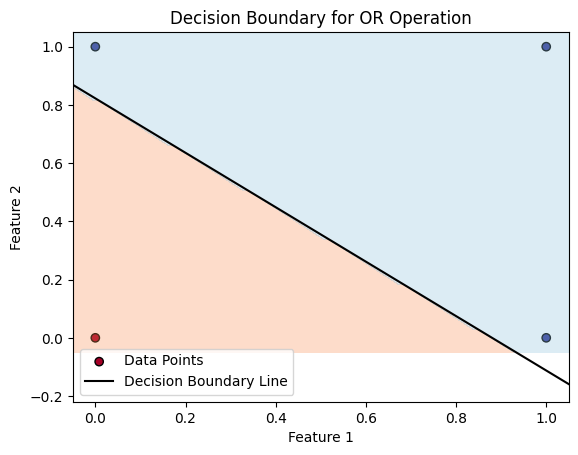

[OR Operation] testing perceptron for OR operation with optimal weights and bias...
[OR Operation] data=[0 0], ground-truth=0, pred=[0]
[OR Operation] data=[0 1], ground-truth=1, pred=[1]
[OR Operation] data=[1 0], ground-truth=1, pred=[1]
[OR Operation] data=[1 1], ground-truth=1, pred=[1]


In [56]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # Initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha

    def step(self, x):
        # Apply the step function element-wise
        return np.where(x > 0, 1, 0)

    def fit(self, X, y, epochs=10):
        # Insert a column of 1's as the last entry in the feature matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # Loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # Loop over each individual data point
            error_sum = 0
            for (x, target) in zip(X, y):
                # Take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))

                # Calculate the error
                error = p - target

                # Update the weight matrix
                self.W += -self.alpha * error * x

                # Accumulate the error for this epoch
                error_sum += np.abs(error)

            # During training, print error, bias, and optimal weights for each epoch
            print("[OR Operation] Epoch={}, Error={}, Bias={}, Optimal Weights={}".format(
                epoch + 1, error_sum, self.W[-1], self.W[:-1]))

            # Terminate the training if the error is 0
            if error_sum == 0:
                print("[OR Operation] Training terminated as error becomes 0.")
                break

        # Print the final optimal weights and bias
        print("\n[OR Operation] Final Optimal Weights: {}".format(self.W[:-1]))
        print("[OR Operation] Final Optimal Bias: {}".format(self.W[-1]))

    def predict(self, X, addBias=True):
        # Ensure our input is a matrix
        X = np.atleast_2d(X)

        # Check to see if the bias column should be added
        if addBias:
            # Insert a column of 1's as the last entry in the feature matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]

        # Take the dot product between the input features and the
        # weight matrix, then pass the value through the step function
        return self.step(np.dot(X, self.W))


    def plot_decision_boundary(self, X, y):
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', label='Data Points')

        # Plot decision boundary
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create meshgrid
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))

        # Flatten the meshgrid and predict for each point
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape and plot filled contour
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')

        # Plot decision boundary line
        ymin, ymax = ylim
        w = self.W[:-1]
        a = -w[0] / w[1]
        xx_line = np.linspace(ymin, ymax)
        yy_line = a * xx_line - (self.W[-1]) / w[1]
        plt.plot(xx_line, yy_line, 'k-', label='Decision Boundary Line')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary for OR Operation')
        plt.legend()
        plt.show()

# Construct the OR dataset
X_or = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_or = np.array([0, 1, 1, 1])

# Define our perceptron and train it
print("[OR Operation] training perceptron for OR operation...")
p_or = Perceptron(X_or.shape[1], alpha=0.1)
p_or.fit(X_or, y_or, epochs=20)

# Plot the decision boundary with data points
p_or.plot_decision_boundary(X_or, y_or)
# Test the perceptron after training
print("[OR Operation] testing perceptron for OR operation with optimal weights and bias...")
for (x, target) in zip(X_or, y_or):
    pred_or = p_or.predict(x)
    print("[OR Operation] data={}, ground-truth={}, pred={}".format(x, target, pred_or))

[NAND Operation] training perceptron for NAND operation...
[NAND Operation] Epoch=1, Error=1, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  1.03650735]
[NAND Operation] Epoch=2, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.93650735]
[NAND Operation] Epoch=3, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.83650735]
[NAND Operation] Epoch=4, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.73650735]
[NAND Operation] Epoch=5, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.63650735]
[NAND Operation] Epoch=6, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.53650735]
[NAND Operation] Epoch=7, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.43650735]
[NAND Operation] Epoch=8, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.33650735]
[NAND Operation] Epoch=9, Error=2, Bias=0.02591399154153276, Optimal Weights=[-0.05195048  0.23650735]
[NAND Operatio

<ipython-input-51-28be444649e5>:85: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')


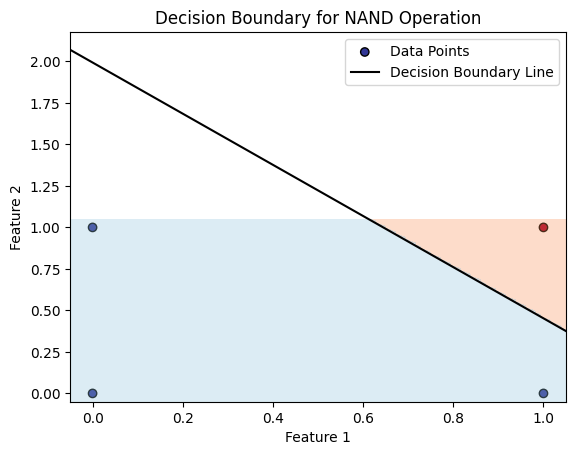

[NAND Operation] testing perceptron for NAND operation with optimal weights and bias...
[NAND Operation] data=[0 0], ground-truth=1, pred=[1]
[NAND Operation] data=[0 1], ground-truth=1, pred=[1]
[NAND Operation] data=[1 0], ground-truth=1, pred=[1]
[NAND Operation] data=[1 1], ground-truth=0, pred=[0]


In [51]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha

    def step(self, x):
        # apply the step function element-wise
        return np.where(x > 0, 1, 0)

    def fit(self, X, y, epochs=10):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            error_sum = 0
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))

                # calculate the error
                error = p - target

                # update the weight matrix
                self.W += -self.alpha * error * x

                # accumulate the error for this epoch
                error_sum += np.abs(error)

            # during training, print error, bias, and optimal weights for each epoch
            print("[NAND Operation] Epoch={}, Error={}, Bias={}, Optimal Weights={}".format(
                epoch + 1, error_sum, self.W[-1], self.W[:-1]))

            # terminate the training if the error is 0
            if error_sum == 0:
                print("[NAND Operation] Training terminated as error becomes 0.")
                break

        # print the final optimal weights and bias
        print("\n[NAND Operation] Final Optimal Weights: {}".format(self.W[:-1]))
        print("[NAND Operation] Final Optimal Bias: {}".format(self.W[-1]))

    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]

        # take the dot product between the input features and the
        # weight matrix, then pass the value through the step
        # function
        return self.step(np.dot(X, self.W))

    def plot_decision_boundary(self, X, y):
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', label='Data Points')

        # Plot decision boundary
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create meshgrid
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))

        # Flatten the meshgrid and predict for each point
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape and plot filled contour
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')

        # Plot decision boundary line
        ymin, ymax = ylim
        w = self.W[:-1]
        a = -w[0] / w[1]
        xx_line = np.linspace(ymin, ymax)
        yy_line = a * xx_line - (self.W[-1]) / w[1]
        plt.plot(xx_line, yy_line, 'k-', label='Decision Boundary Line')

        plt.xlabel('Feature 1')
        plt.ylabel('Feature 2')
        plt.title('Decision Boundary for NAND Operation')
        plt.legend()
        plt.show()

# Construct the NAND dataset
X_nand = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_nand = np.array([1, 1, 1, 0])

# Define our perceptron and train it
print("[NAND Operation] training perceptron for NAND operation...")
p_nand = Perceptron(X_nand.shape[1], alpha=0.1)
p_nand.fit(X_nand, y_nand, epochs=20)

# Plot the decision boundary with data points
p_nand.plot_decision_boundary(X_nand, y_nand)
# Test the perceptron after training
print("[NAND Operation] testing perceptron for NAND operation with optimal weights and bias...")
for (x, target) in zip(X_nand, y_nand):
    pred_nand = p_nand.predict(x)
    print("[NAND Operation] data={}, ground-truth={}, pred={}".format(x, target, pred_nand))

[INFO] training perceptron for XOR operation...
[INFO] Epoch=1, Error=1, Bias=0.8218292381537864, Accuracy=50.00%
[INFO] Epoch=2, Error=1, Bias=0.6218292381537864, Accuracy=75.00%
[INFO] Epoch=3, Error=1, Bias=0.5218292381537865, Accuracy=50.00%
[INFO] Epoch=4, Error=0, Bias=0.5218292381537865, Accuracy=75.00%
[INFO] Epoch=5, Error=0, Bias=0.5218292381537865, Accuracy=75.00%
[INFO] Epoch=6, Error=0, Bias=0.4218292381537865, Accuracy=75.00%
[INFO] Epoch=7, Error=0, Bias=0.4218292381537865, Accuracy=75.00%
[INFO] Epoch=8, Error=0, Bias=0.3218292381537865, Accuracy=75.00%
[INFO] Epoch=9, Error=0, Bias=0.3218292381537865, Accuracy=75.00%
[INFO] Epoch=10, Error=0, Bias=0.2218292381537865, Accuracy=75.00%
[INFO] Epoch=11, Error=0, Bias=0.2218292381537865, Accuracy=75.00%
[INFO] Epoch=12, Error=1, Bias=0.12182923815378649, Accuracy=25.00%
[INFO] Epoch=13, Error=1, Bias=0.12182923815378649, Accuracy=25.00%
[INFO] Epoch=14, Error=1, Bias=0.12182923815378649, Accuracy=25.00%
[INFO] Epoch=15, Err

<ipython-input-47-b0ee4124fc6c>:77: UserWarning: The following kwargs were not used by contour: 'label'
  plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')


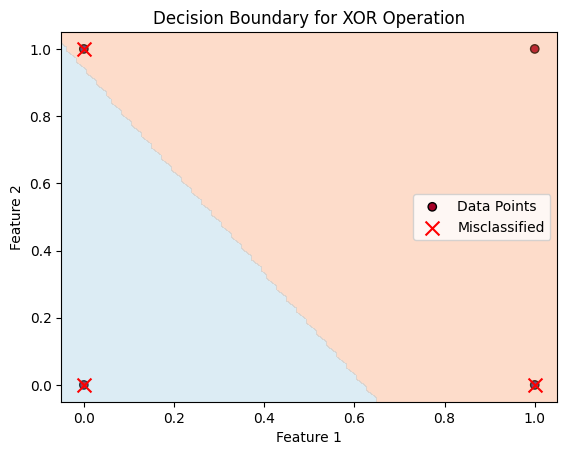

[XOR Operation] testing perceptron for XOR operation with optimal weights and bias...
[XOR Operation] data=[0 0], ground-truth=0, pred=[1]
[XOR Operation] data=[0 1], ground-truth=1, pred=[0]
[XOR Operation] data=[1 0], ground-truth=1, pred=[0]
[XOR Operation] data=[1 1], ground-truth=0, pred=[0]


In [47]:
import numpy as np
import matplotlib.pyplot as plt

class Perceptron:
    def __init__(self, N, alpha=0.1):
        # initialize the weight matrix and store the learning rate
        self.W = np.random.randn(N + 1) / np.sqrt(N)
        self.alpha = alpha

    def step(self, x):
        # apply the step function element-wise
        return np.where(x > 0, 1, 0)

    def fit(self, X, y, epochs=10):
        # insert a column of 1's as the last entry in the feature
        # matrix -- this little trick allows us to treat the bias
        # as a trainable parameter within the weight matrix
        X = np.c_[X, np.ones((X.shape[0]))]

        # loop over the desired number of epochs
        for epoch in np.arange(0, epochs):
            # loop over each individual data point
            for (x, target) in zip(X, y):
                # take the dot product between the input features
                # and the weight matrix, then pass this value
                # through the step function to obtain the prediction
                p = self.step(np.dot(x, self.W))

                # calculate the error
                error = p - target

                # update the weight matrix
                self.W += -self.alpha * error * x

            # during training, print error and bias for each epoch
            predictions = self.predict(X[:, :-1])  # exclude bias column from X
            accuracy = np.mean(predictions == y.flatten())
            print("[INFO] Epoch={}, Error={}, Bias={}, Accuracy={:.2%}".format(
                epoch + 1, np.sum(np.abs(error)), self.W[-1], accuracy))

        # Plot decision boundary and misclassified points after training
        self.plot_decision_boundary(X[:, :-1], y)

    def predict(self, X, addBias=True):
        # ensure our input is a matrix
        X = np.atleast_2d(X)

        # check to see if the bias column should be added
        if addBias:
            # insert a column of 1's as the last entry in the feature
            # matrix (bias)
            X = np.c_[X, np.ones((X.shape[0]))]

        # take the dot product between the input features and the
        # weight matrix, then pass the value through the step
        # function
        return self.step(np.dot(X, self.W))

    def plot_decision_boundary(self, X, y):
        # Plot data points
        plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k', marker='o', label='Data Points')

        # Plot decision boundary
        ax = plt.gca()
        xlim = ax.get_xlim()
        ylim = ax.get_ylim()

        # Create meshgrid
        xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100),
                             np.linspace(ylim[0], ylim[1], 100))

        # Flatten the meshgrid and predict for each point
        Z = self.predict(np.c_[xx.ravel(), yy.ravel()])

        # Reshape and plot filled contour
        Z = Z.reshape(xx.shape)
        plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.3, levels=[-1, 0, 1], label='Decision Boundary')

        # Plot misclassified points
        predictions = self.predict(X)
        misclassified = X[predictions != y.flatten()]
        plt.scatter(misclassified[:, 0], misclassified[:, 1], c='red', marker='x', s=100, label='Misclassified')

        plt.xlabel('X-coordinates')
        plt.ylabel('Y-coordinates')
        plt.title('Decision Boundary for XOR Operation')
        plt.legend()
        plt.show()

# Construct the XOR dataset
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

# Define our perceptron and train it
print("[INFO] training perceptron for XOR operation...")
p_xor = Perceptron(X_xor.shape[1], alpha=0.1)
p_xor.fit(X_xor, y_xor, epochs=20)
# Test the perceptron after training
print("[XOR Operation] testing perceptron for XOR operation with optimal weights and bias...")
for (x, target) in zip(X_xor, y_xor):
    pred_xor = p_xor.predict(x)
    print("[XOR Operation] data={}, ground-truth={}, pred={}".format(x, target, pred_xor))

In [109]:
import itertools
import numpy as np

np.random.seed(42) # this makes sure you get the same results as me

def xor(x1, x2):
    return bool(x1) != bool(x2)

def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(sigmoid_result):
    return sigmoid_result * (1 - sigmoid_result)

def error(target, prediction):
    return .5 * (target - prediction)**2

def error_derivative(target, prediction):
    return - target + prediction

x = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([[xor(*i)] for i in x], dtype=int)

alpha = 0.02
n_neurons_input, n_neurons_hidden, n_neurons_output = 2, 2, 1

w_hidden = np.random.random(size=(n_neurons_input, n_neurons_hidden))
b_hidden = np.random.random(size=(1, n_neurons_hidden))

w_output = np.random.random(size=(n_neurons_hidden, n_neurons_output))
b_output = np.random.random(size=(1, n_neurons_output))

errors = []
params = []
grads = []
while True:
    # forward prop
    y_hidden = sigmoid(np.dot(x, w_hidden) + b_hidden)
    y_output = sigmoid(np.dot(y_hidden, w_output) + b_output)

    # calculate mean error of all the errors for this epoch
    e = error(y, y_output).mean()
    if e < 1e-4:
        break

    # back prop
    grad_output = error_derivative(y, y_output) * sigmoid_derivative(y_output)
    grad_hidden = grad_output.dot(w_output.T) * sigmoid_derivative(y_hidden)

    # update parameters
    w_output -= alpha * y_hidden.T.dot(grad_output)
    w_hidden -= alpha * x.T.dot(grad_hidden)

    b_output -= alpha * np.sum(grad_output)
    b_hidden -= alpha * np.sum(grad_hidden)

    # record intermediate results
    errors.append(e)
    grads.append(np.concatenate((grad_output.ravel(), grad_hidden.ravel())))
    params.append(np.concatenate((w_output.ravel(), b_output.ravel(),
                                  w_hidden.ravel(), b_hidden.ravel())))

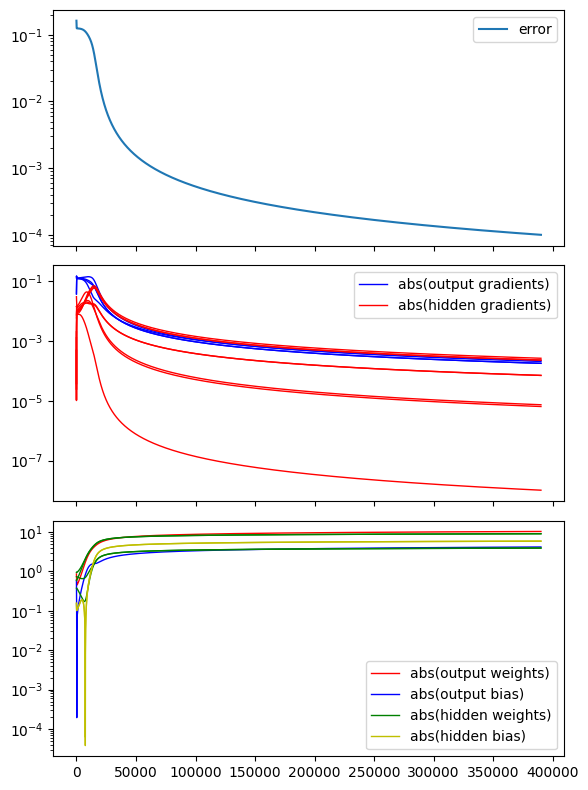

In [105]:
import matplotlib.pyplot as plt
import pandas as pd

fig, axes = plt.subplots(3, 1, figsize=(6, 8), sharex=True)

pd.DataFrame(errors, columns=['error']).plot(ax=axes[0], logy=True)
df_grads = pd.DataFrame(grads)
df_params = pd.DataFrame(params)

for i in range(4):
    axes[1].plot(df_grads.iloc[:, i].abs(), c='b', label='abs(output gradients)' if i==1 else '__nolabel', lw=1)
for i in range(4, 12):
    axes[1].plot(df_grads.iloc[:, i].abs(), c='r', label='abs(hidden gradients)' if i==4 else '__nolabel', lw=1)

for i in range(1, 2):
    axes[2].plot(df_params.iloc[:, i].abs(), c='r', label='abs(output weights)' if i==1 else '__nolabel', lw=1)

axes[2].plot(df_params.iloc[:, 2].abs(), c='b', label='abs(output bias)', lw=1)

for i in range(3, 7):
    axes[2].plot(df_params.iloc[:, i].abs(), c='g', label='abs(hidden weights)' if i==3 else '__nolabel', lw=1)

for i in range(7, 9):
    axes[2].plot(df_params.iloc[:, i].abs(), c='y', label='abs(hidden bias)' if i==7 else '__nolabel', lw=1)

axes[1].legend()
axes[1].set_yscale('log')

axes[2].legend()
axes[2].set_yscale('log')

fig.tight_layout()

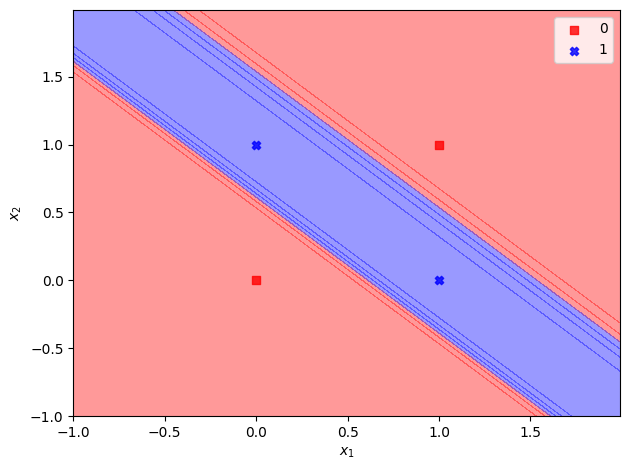

In [107]:
resolution = 0.01  # Set the desired resolution

x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                       np.arange(x2_min, x2_max, resolution))

z = predict(np.array([xx1.ravel(), xx2.ravel()]).T)
z = z.reshape(xx1.shape)

fig, ax = plt.subplots()
ax.contourf(xx1, xx2, z, alpha=0.4, cmap=ListedColormap(colors))
ax.set_xlim(xx1.min(), xx1.max())
ax.set_ylim(xx2.min(), xx2.max())

for idx, cl in enumerate(np.unique(y)):
    ax.scatter(x=x[(y == cl).ravel(), 0],
               y=x[(y == cl).ravel(), 1],
               alpha=0.8, c=colors[idx],
               marker=markers[idx], label=cl)
ax.legend()
ax.set_xlabel('$x_1$')
ax.set_ylabel('$x_2$')
fig.tight_layout()
plt.show()


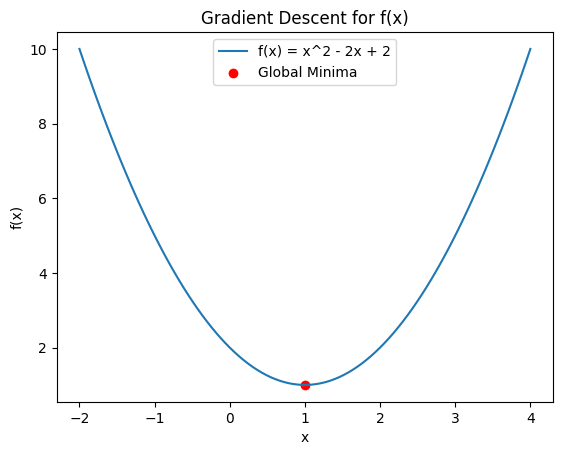

Global Minima found at x = 0.9999996093982342, f(x) = 1.0000000000001525
Number of iterations: 64


In [32]:
import numpy as np
import matplotlib.pyplot as plt

def f(x):
    return x**2 - 2*x + 2

def gradient_descent(f, df, learning_rate=0.1, epsilon=1e-6, max_iterations=1000):
    x = np.random.rand()  # Initialize with a random value
    iterations = 0

    while True:
        gradient = df(x)
        x = x - learning_rate * gradient
        iterations += 1

        if abs(gradient) < epsilon or iterations >= max_iterations:
            break

    return x, f(x), iterations

def df(x):
    return 2*x - 2

# Run gradient descent
minima_x, minima_value, iterations = gradient_descent(f, df)

# Visualization
x_vals = np.linspace(-2, 4, 100)
y_vals = f(x_vals)

plt.plot(x_vals, y_vals, label='f(x) = x^2 - 2x + 2')
plt.scatter(minima_x, minima_value, color='red', label='Global Minima')
plt.title('Gradient Descent for f(x)')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

print(f"Global Minima found at x = {minima_x}, f(x) = {minima_value}")
print(f"Number of iterations: {iterations}")


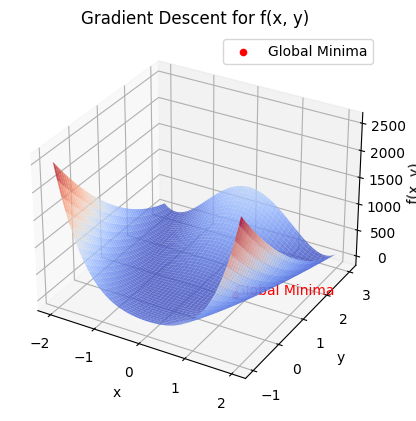

Global Minima found at (x, y) = (0.8975389106250041, 0.8155047701531415), f(x, y) = 0.020356131709224172
Number of iterations: 1000


In [115]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

def gradient_descent_2d(f, df_dx, df_dy, learning_rate=0.01, epsilon=1e-6, max_iterations=1000):
    x, y = np.random.rand(), np.random.rand()  # Initialize with random values
    iterations = 0

    while True:
        gradient_x = df_dx(x, y)
        gradient_y = df_dy(x, y)

        # Normalize gradients
        gradient_norm = np.sqrt(gradient_x**2 + gradient_y**2)
        gradient_x /= gradient_norm
        gradient_y /= gradient_norm

        x = x - learning_rate * gradient_x
        y = y - learning_rate * gradient_y
        iterations += 1

        if gradient_norm < epsilon or iterations >= max_iterations:
            break

    return x, y, f(x, y), iterations

def df_dx(x, y):
    return 2 * (x - 1) - 400 * x * (y - x**2)

def df_dy(x, y):
    return 200 * (y - x**2)

# Run gradient descent
minima_x, minima_y, minima_value, iterations = gradient_descent_2d(f, df_dx, df_dy)

# Visualization
x_vals = np.linspace(-2, 2, 100)
y_vals = np.linspace(-1, 3, 100)
X, Y = np.meshgrid(x_vals, y_vals)
Z = f(X, Y)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, Z, cmap='coolwarm', alpha=0.8)
ax.scatter([minima_x], [minima_y], [minima_value], color='red', label='Global Minima')

# Annotate the global minima with text
ax.text(minima_x, minima_y, minima_value, 'Global Minima', color='red')

ax.set_title('Gradient Descent for f(x, y)')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('f(x, y)')
ax.legend()
plt.show()

print(f"Global Minima found at (x, y) = ({minima_x}, {minima_y}), f(x, y) = {minima_value}")
print(f"Number of iterations: {iterations}")
